# TITANIC SURVIVAL PREDICTION

The Titanic Survival Prediction project uses historical passenger data to predict whether individuals survived the Titanic disaster. By analyzing features such as age, gender, class, and fare, the goal is to develop a machine learning model that identifies patterns linked to survival. This project focuses on advanced data preprocessing, feature engineering, and model optimization to create a robust, accurate predictive model.

In [110]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
# Reading the dataset
titanic_data = pd.read_csv('Titanic-Dataset.csv') 

In [112]:
# Display first 5 rows 
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
# It shows the total number of rows and columns from the dataset
titanic_data.shape

(891, 12)

In [114]:
# It shows name of each column
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [115]:
# It shows the data type of each column
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [116]:
# show information about the dataset
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [117]:
# It shows the summary statistics of each column
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [118]:
# It shows the total number of non-null values
titanic_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [119]:
# It shows the count the number of unique value of each column
titanic_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

# Data Cleaning

In [121]:
# Drop irrelevant columns
titanic_data = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [122]:
# checking for missing value
titanic_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

<Axes: >

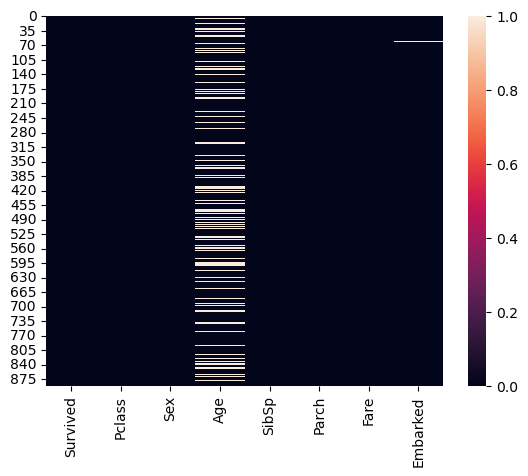

In [123]:
# Visualizing missing values
sns.heatmap(titanic_data.isnull())

In [124]:
# Fill missing values in the Age column with the median age
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace = True)

C:\Users\swapn\AppData\Local\Temp\ipykernel_7164\1564196122.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace = True)


In [125]:
# Fill missing values in the Embarked column with the mode
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace = True)
# [0]: This selects the first element of the Series returned by mode()

C:\Users\swapn\AppData\Local\Temp\ipykernel_7164\2023622363.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace = True)


In [126]:
# Cheking null values
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [127]:
# Display first 5 rows to check the changes
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [128]:
# Checking for duplicates value
titanic_data.duplicated().sum()

111

In [129]:
# Drop all duplicate rows
titanic_data = titanic_data.drop_duplicates()

In [130]:
# checking duplicates
titanic_data.duplicated().sum()

0

# Handling Outlier

<Axes: >

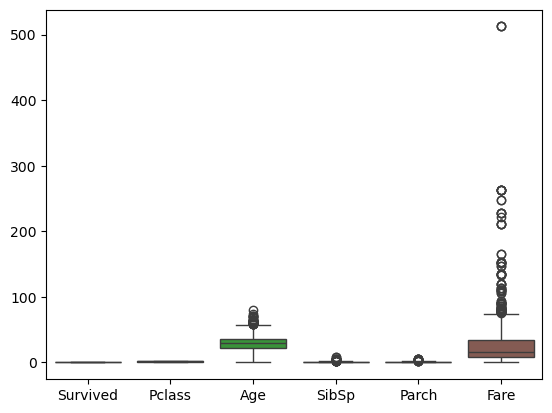

In [132]:
# Visualize outliers for the column using boxplot
plt.figure.figsize = (10,8)
sns.boxplot(titanic_data)

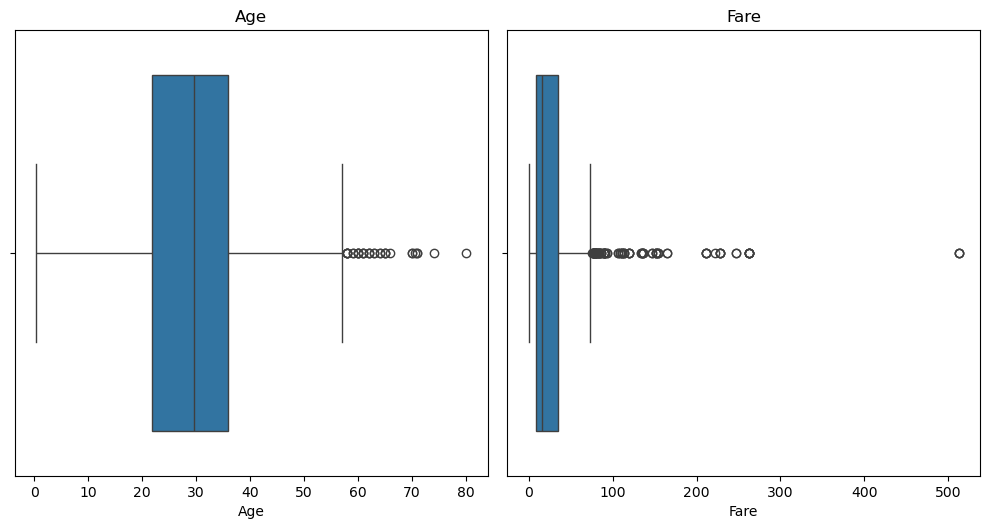

In [133]:
plt.figure(figsize=(10, 10))

# Boxplot for Age
plt.subplot(2, 2, 1)
sns.boxplot(data=titanic_data, x='Age')
plt.title('Age')

# Boxplot for Fare
plt.subplot(2, 2, 2)
sns.boxplot(data=titanic_data, x='Fare')
plt.title('Fare')

# Adjust layout
plt.tight_layout()
plt.show()


In [134]:
# Remove outliers based on IQR
numerical_cols = ['Age','Fare']
for col in numerical_cols:
    Q1 = titanic_data[col].quantile(0.25)
    Q3 = titanic_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove rows with outliers
    titanic_data = titanic_data[(titanic_data[col] >= lower_bound) & (titanic_data[col] <= upper_bound)]

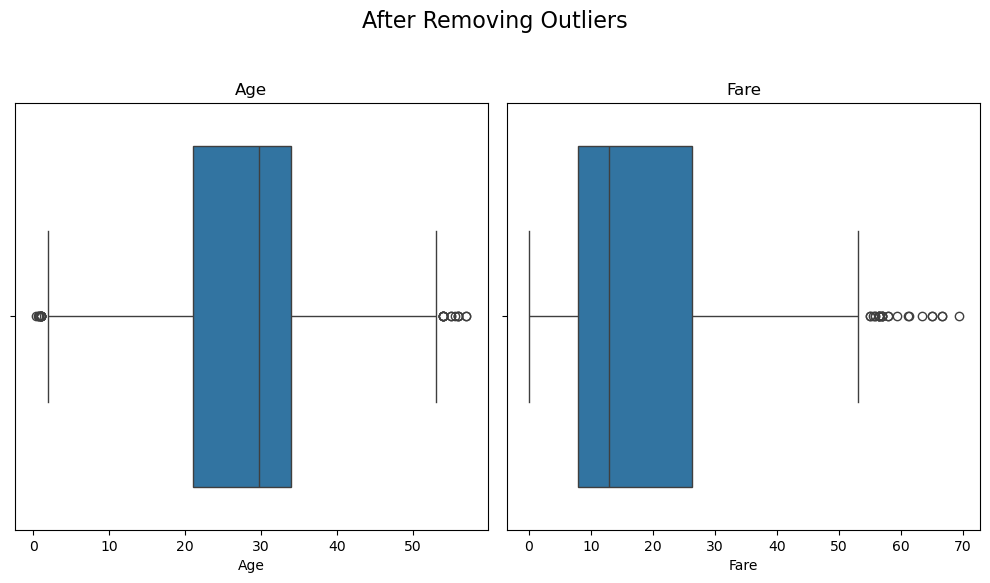

In [135]:
plt.figure(figsize=(10, 10))

# Boxplot for Age
plt.subplot(2, 2, 1)
sns.boxplot(data=titanic_data, x='Age')
plt.title('Age')

# Boxplot for Fare
plt.subplot(2, 2, 2)
sns.boxplot(data=titanic_data, x='Fare')
plt.title('Fare')

# Add a global title for the figure
plt.suptitle('After Removing Outliers', fontsize=16, y=1.02)  # Adjust y for spacing

# Adjust layout
plt.tight_layout()
plt.show()


In [136]:
titanic_data.shape

(650, 8)

# Encoding Categorical Variables

In [138]:
# Encode sex column
titanic_data['Sex'] = titanic_data['Sex'].map({'male':0,'female':1})

In [139]:
# Encode Embarked columns
titanic_data['Embarked'] = titanic_data['Embarked'].map({'C':0,'Q':1,'S':2})

# Exploratory Data Analysis

Univariate Analysis

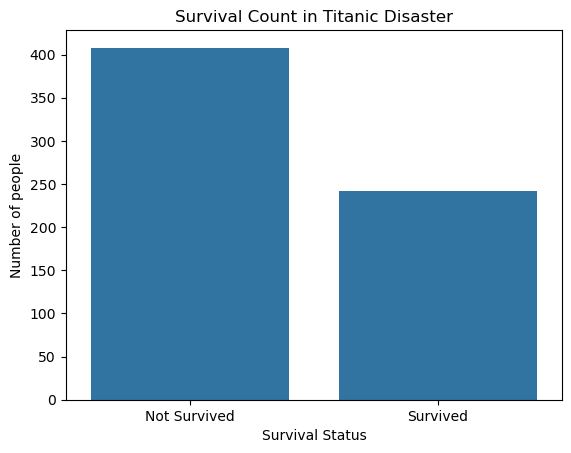

In [142]:
# Plot the count of each class in the 'Survived' column
sns.countplot(x = 'Survived',data = titanic_data)
plt.title('Survival Count in Titanic Disaster')
plt.xlabel('Survival Status')
plt.ylabel('Number of people')
plt.xticks(ticks = [0,1],labels = ['Not Survived','Survived']) # Customize xtick labels
plt.show()

C:\Users\swapn\AppData\Local\Temp\ipykernel_7164\4174149512.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Embarked',data = titanic_data,palette = 'viridis')


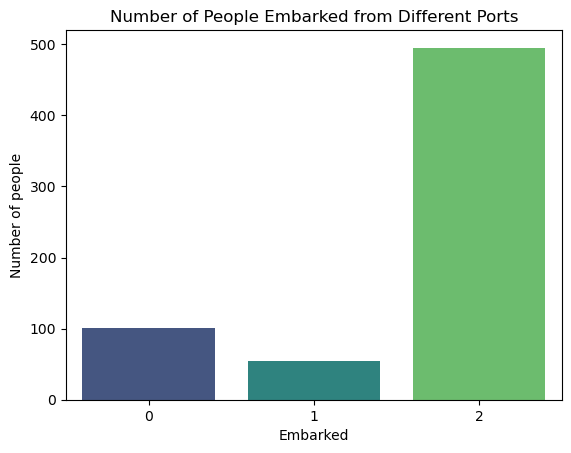

In [143]:
sns.countplot(x = 'Embarked',data = titanic_data,palette = 'viridis')
plt.title('Number of People Embarked from Different Ports')
plt.xlabel('Embarked')
plt.ylabel('Number of people')
plt.show()

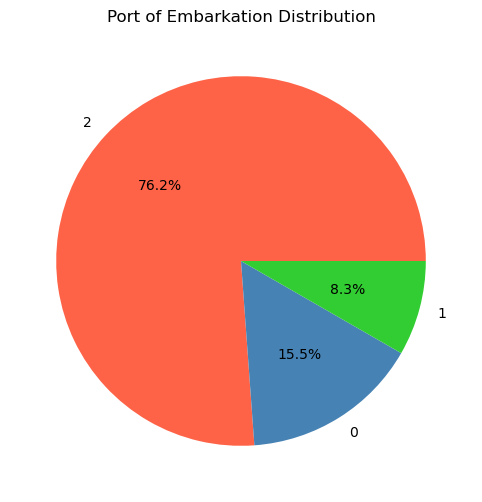

In [144]:
# Count the occurrences of each category in the 'Embarked' column
embarked_counts = titanic_data['Embarked'].value_counts()
plt.figure(figsize = (8,6))
plt.pie(embarked_counts,labels=embarked_counts.index, autopct='%1.1f%%', colors=['#ff6347', '#4682b4', '#32cd32'])
plt.title('Port of Embarkation Distribution')
plt.show()

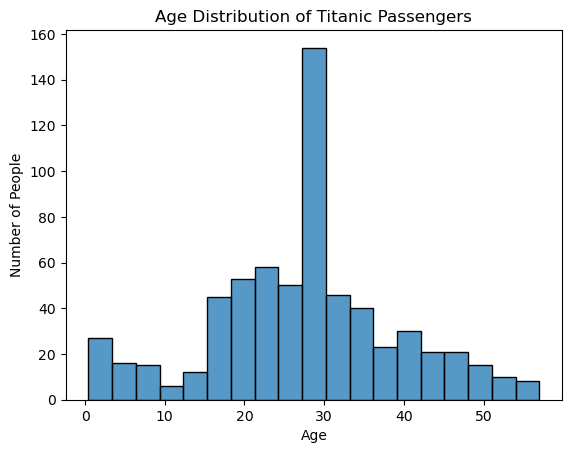

In [145]:
# Plot the histogram of the 'Age' column
sns.histplot(titanic_data['Age'])
plt.title('Age Distribution of Titanic Passengers')  
plt.xlabel('Age')                                   
plt.ylabel('Number of People')                      
plt.show()  

Bivariate Analysis

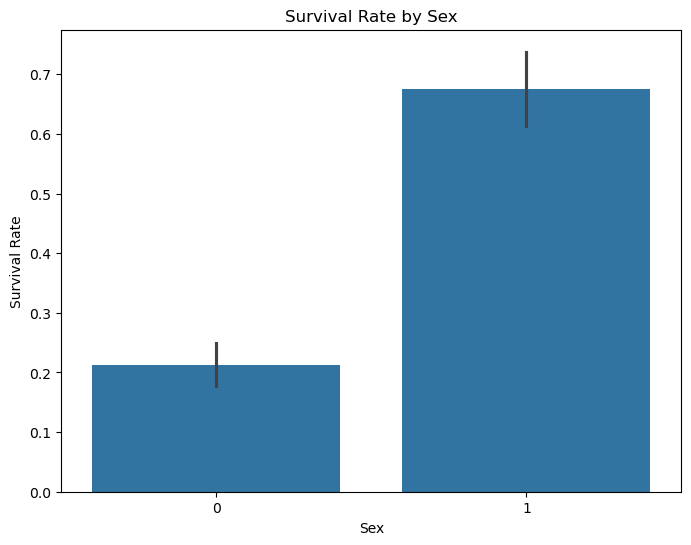

In [147]:
# Relationship between 'Sex' and 'Survived'
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=titanic_data)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

Multivariate Analysis

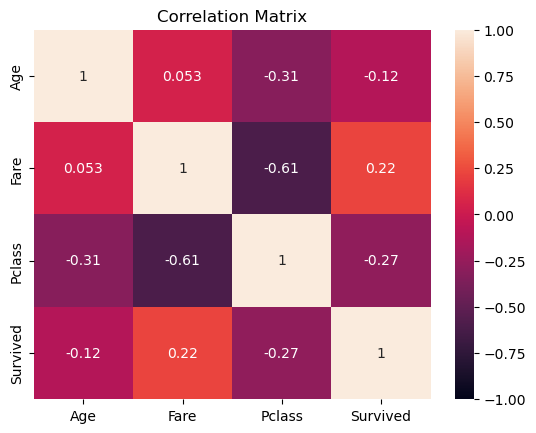

In [149]:
# Compute the correlation matrix
correlation_matrix = titanic_data[['Age', 'Fare', 'Pclass', 'Survived']].corr()
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Model Development

Data Splitting

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

# Separate features and target
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Building (Logistic Regression)

In [154]:
# Train a Logistic Regression model
log_reg = LogisticRegression(max_iter=100, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

Model Prediction

In [156]:
# Predict and evaluate
y_pred_log = log_reg.predict(X_test)

Model Evaluation 

In [158]:
# Print evaluation results
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.7923076923076923

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84        82
           1       0.77      0.62      0.69        48

    accuracy                           0.79       130
   macro avg       0.79      0.76      0.77       130
weighted avg       0.79      0.79      0.79       130



In [159]:
# Show predictions for the first 5 passengers in the test set
print("Predicted Survival Status:", y_pred_log[:5])

Predicted Survival Status: [0 1 0 1 0]


In [160]:
# Add predictions to the test data for better visualization
X_test_with_predictions = X_test.copy()
X_test_with_predictions['Predicted_Survived'] = y_pred_log
print(X_test_with_predictions.head())

     Pclass  Sex   Age  SibSp  Parch    Fare  Embarked  Predicted_Survived
873       3    0  47.0      0      0   9.000         2                   0
273       1    0  37.0      0      1  29.700         0                   1
582       2    0  54.0      0      0  26.000         2                   0
432       2    1  42.0      1      0  26.000         2                   1
86        3    0  16.0      1      3  34.375         2                   0


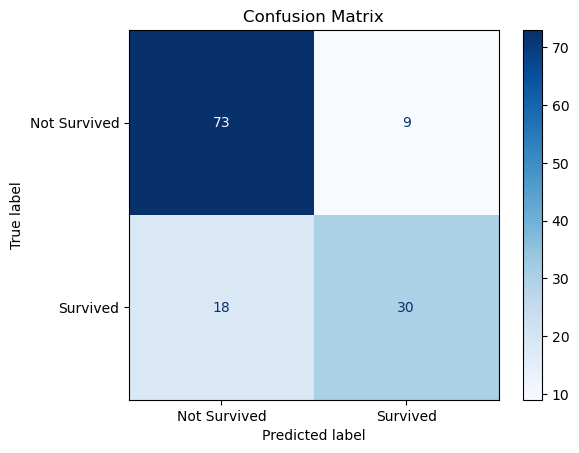

In [161]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_log)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

Prediction By Using Random Forest Model

In [163]:
# Build and Train the Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [164]:
# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7076923076923077
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.78      0.77        82
           1       0.61      0.58      0.60        48

    accuracy                           0.71       130
   macro avg       0.69      0.68      0.68       130
weighted avg       0.71      0.71      0.71       130



Accuracy: 0.7076923076923077
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.78      0.77        82
           1       0.61      0.58      0.60        48

    accuracy                           0.71       130
   macro avg       0.69      0.68      0.68       130
weighted avg       0.71      0.71      0.71       130

Confusion Matrix:
 [[64 18]
 [20 28]]
Feature Importances:
     Feature  Importance
5      Fare    0.299480
2       Age    0.298768
1       Sex    0.183921
0    Pclass    0.075435
3     SibSp    0.056674
4     Parch    0.047516
6  Embarked    0.038206


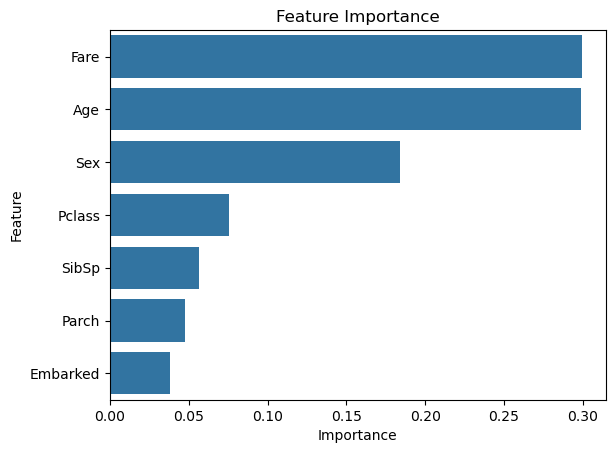

In [165]:
# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", feature_importances)

# Visualize Feature Importance
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()

In [166]:
# Show predictions for the first 5 passengers in the test set
print("Predicted Survival Status:", y_pred[:5])

Predicted Survival Status: [0 0 0 0 0]


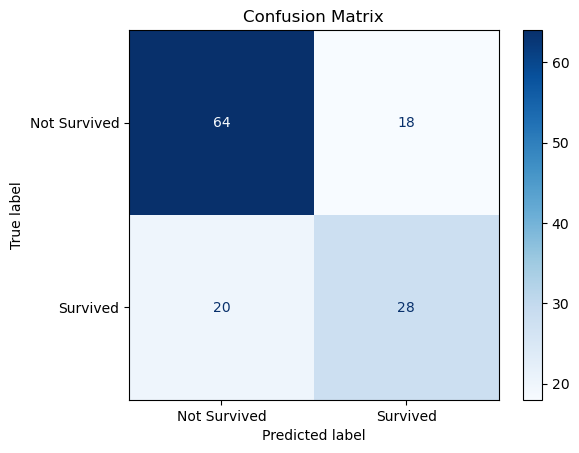

In [167]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()